In [87]:
using Random, JuMP, Gurobi, Plots, Distances

In [88]:
n = 50 # number of customers
Random.seed!(1)
x_pos = rand(0:15, n)
y_pos = rand(0:15, n);

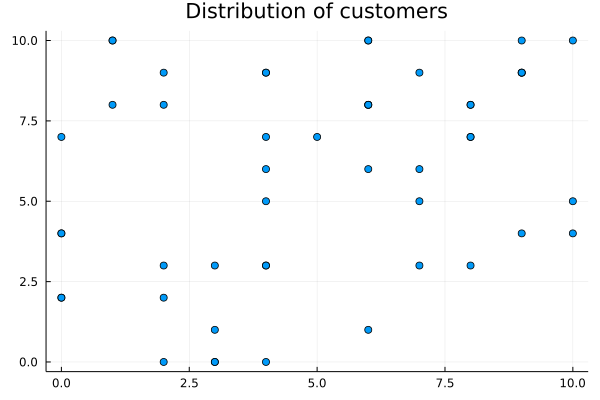

In [89]:
scatter(x_pos, y_pos, title = "Distribution of customers", legend = false)

In [90]:
# Parameters

distance = Dict((i,j) => euclidean((x_pos[i], y_pos[i]), (x_pos[j], y_pos[j])) for i = 1:n, j = 1:n);

In [91]:
# Sets
N = 1:n;

In [92]:
# Model 
mdl = Model(Gurobi.Optimizer)

# Decision variables
@variable(mdl, x[i in N, j in N], Bin)
@variable(mdl, u[i in N], Int);

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-09


In [93]:
# Objective function

@objective(mdl, Min, sum(distance[i, j] * x[i, j] for i in N, j in N));

In [94]:
# Constraints
@constraint(mdl, [j in N], sum(x[i, j] for i in N if i!=j) == 1);
@constraint(mdl, [i in N], sum(x[i, j] for j in N if j!=i) == 1);
@constraint(mdl, [i in N, j in 2:n], u[i]-u[j]+(n-1)*x[i,j] <= n-2);

In [95]:
JuMP.optimize!(mdl)

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2550 rows, 2550 columns and 12152 nonzeros
Model fingerprint: 0x0d014f4b
Variable types: 0 continuous, 2550 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 98 rows and 51 columns
Presolve time: 0.02s
Presolved: 2452 rows, 2499 columns, 11956 nonzeros
Variable types: 0 continuous, 2499 integer (2450 binary)

Root relaxation: objective 3.381239e+01, 265 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   33.81239    0   80          -   33.81239      -     -    0s
     0     0   49.73669    0  100          -   49.73669      -     -    

In [96]:
x_opt = [(i,j) for i in N, j in N if JuMP.value.(x)[i, j] >= 0.9];
x_opt

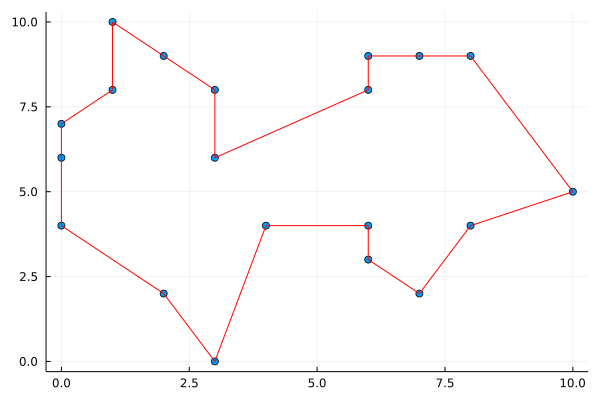

In [ ]:
sc1 = scatter(x_pos, y_pos, legend = false)
plot!([[x_pos[x_opt[i][1]], x_pos[x_opt[i][2]]] for i in 1:length(x_opt)], 
[[y_pos[x_opt[i][1]], y_pos[x_opt[i][2]]] for i in 1:length(x_opt)], color="red")